In [3]:
# feature extraction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [177]:
INPUT_DIR = "./../result/"
FREQ = 30
files = []
for file in os.listdir(INPUT_DIR):
    if 'final' in file:
        files.append(file)

In [9]:
data = pd.read_csv(INPUT_DIR + "1_final.csv")

In [82]:
# aData is a piece of data for one activity
aData = data[(data.ActivityNumber==3) & (data.Index==0)]
aData = aData.loc[:,["accelX", "accelY", "accelZ"]]
aData = np.array(aData)

In [83]:
y = np.sqrt(np.sum(np.square(aData), axis=1))
x = np.arange(len(y))

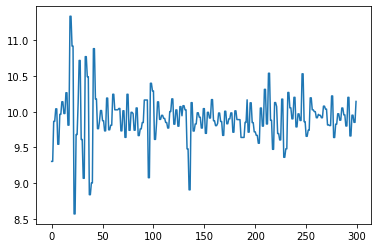

In [84]:
plt.plot(x, y)
plt.show()

In [210]:
class FeatureExtraction:
    def __init__(self, input, freq):
        # initialize with a 2D numpy array only contains X, Y and Z axes.
        self.input = input
        self.freq = freq

    def calVm(self):
        self.vm = np.sqrt(np.sum(np.square(self.input), axis=1))
        
    def calAngle(self):
        # make sure the first axis is X-axis
        self.angle = 90*np.arcsin(self.input[:, 0]/self.vm)/(np.pi/2)
    
    def calFFT(self):
        # perform FFT and save result
        self.w = np.fft.fft(self.vm)[0:int(np.ceil(len(self.vm)/2))]
        self.freqs = np.fft.fftfreq(len(self.vm))[0:int(np.ceil(len(self.vm)/2))] * self.freq
        
    def getClosestIndexLeft(self, arr, val):
        i = 0
        while(arr[i] < val):
            i += 1
            
        if(arr[i+1] == val):
            return(i+1)
        
        if(i == 0):
            i += 1
        
        return(i-1)
        
    def getClosestIndexRight(self, arr, val):
        i = 0
        while(arr[i] < val):
            i += 1
        
        if(arr[i+1] == val):
            return(i+1)
        
        if(i == 0):
            i += 1
        
        if(i == len(arr)):
            i -= 1;
        
        return(i)
    def mvm(self):
        # mean of vector magnitude
        return(np.mean(self.vm))
    
    def sdvm(self):
        # standard deviation of vector magnitude
        return(np.std(self.vm))
    
    def mangle(self):
        # mean of angles
        return(np.mean(self.angle))
    
    def sdangle(self):
        # standard deviation of angles
        return(np.std(self.angle))
    
    def p625(self):
        # Percentage of the power of the vector 
        # magnitude that is in 0.6-2.5Hz 
        
        # first need to find first index > 0.6 and last index < 2.5
        
    def dominantFrequency(self):
        i = np.argmax(abs(self.w))
        dom_freq = self.freqs[i]
        dom_freq_hz = abs(dom_freq)
        return dom_freq_hz
    
    def fpdf(self):
        # Fraction of power in vector magnitude at
        # dominant frequency
        i = np.argmax(abs(self.w))
        fraction = abs(self.w[i])/np.sum(abs(np.delete(self.w, i)))
        return fraction
    
    def plot(self):
        self.calVm()
        self.calFFT()
        plt.plot(self.freqs, abs(self.w))
        plt.show()
        
    def getFeatures(self):
        
        # calculate Vector Magnitude
        self.calVm()
        mvm = self.mvm()
        sdvm = self.sdvm()
        
        # FFT
        self.calFFT()  # perform the calculations first
        dom_freq_hz = self.dominantFrequency()
        fpdf = self.fpdf()
        
        # calculate Angle
        self.calAngle()
        mangle = self.mangle()
        sdangle = self.sdangle()
        
        return([mvm, sdvm, dom_freq_hz, mangle, sdangle])

In [161]:
features = FeatureExtraction(aData)
features.getFeatures()

[9.911744992109929, 0.3494917436360394, -12.27460498325242, 2.7108081556713612]

In [162]:
features.getFeatures()

[9.911744992109929, 0.3494917436360394, -12.27460498325242, 2.7108081556713612]

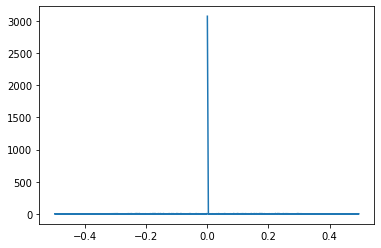

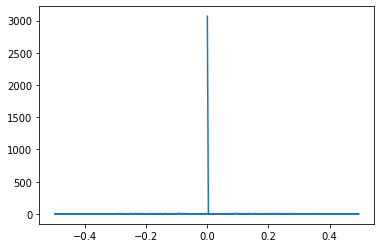

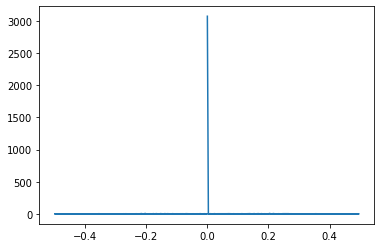

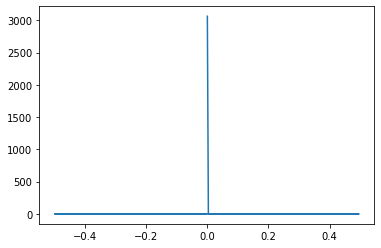

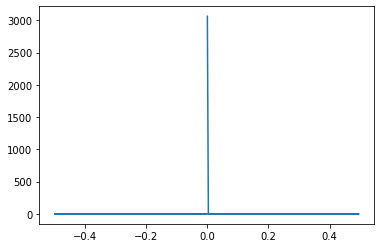

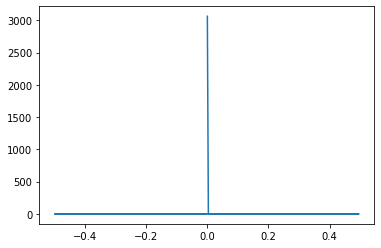

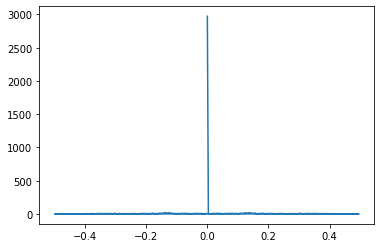

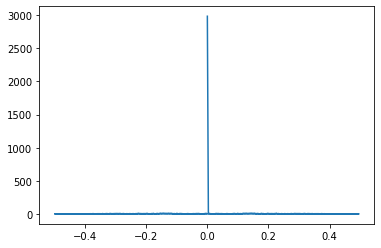

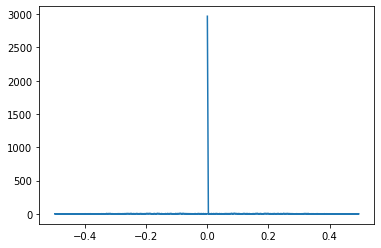

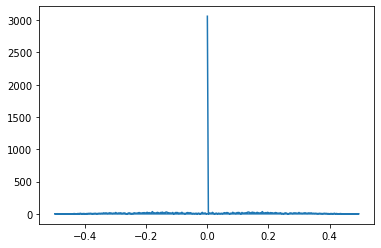

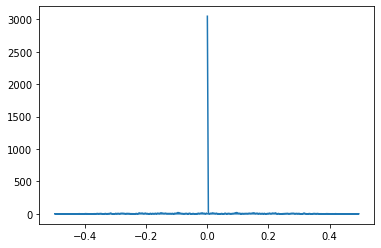

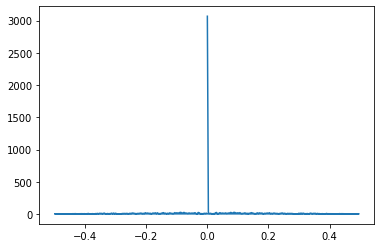

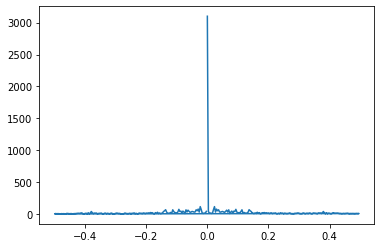

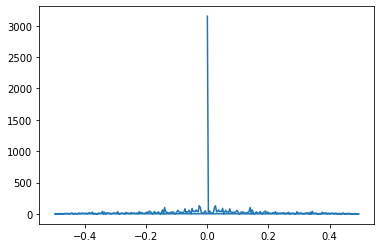

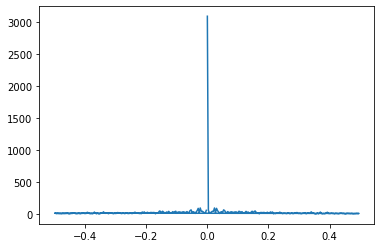

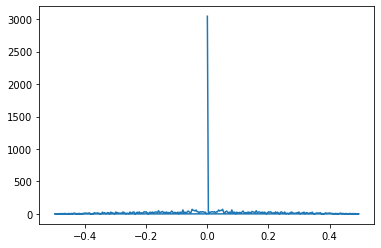

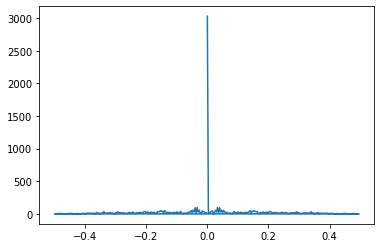

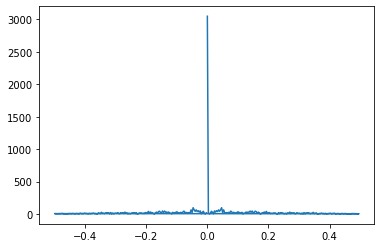

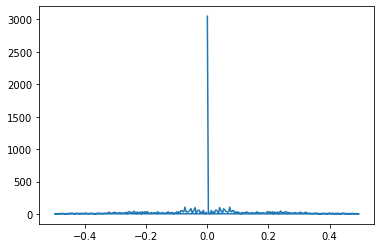

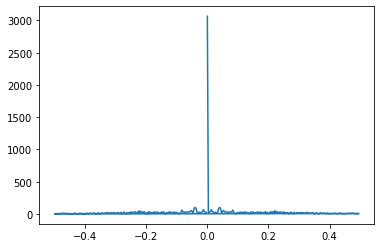

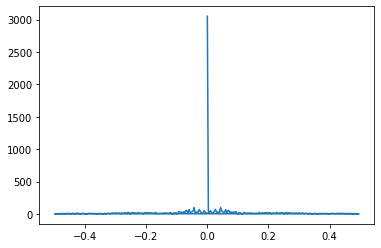

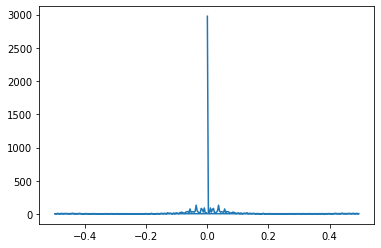

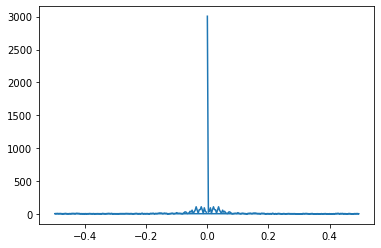

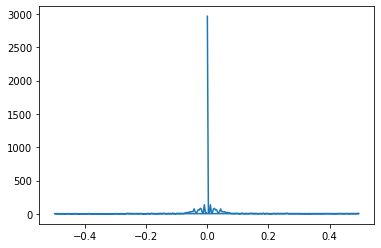

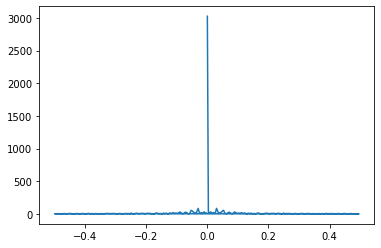

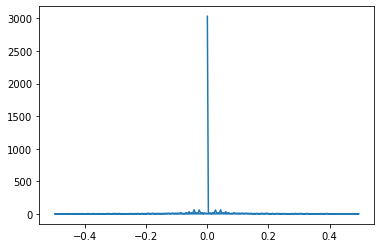

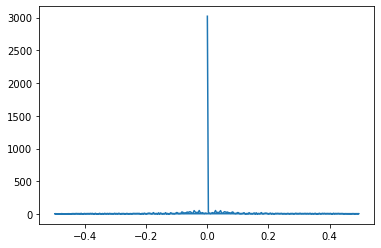

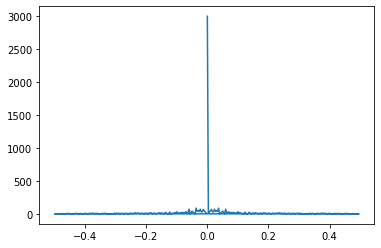

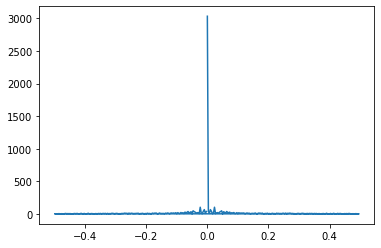

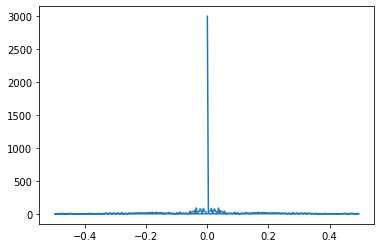

In [211]:
for i in range(1, 11):
    for j in range(0, 3):
        aData = data[(data.ActivityNumber==i) & (data.Index==j)]
        aData = aData.loc[:,["accelX", "accelY", "accelZ"]]
        aData = np.array(aData)
        features =FeatureExtraction(aData, FREQ)
        features.plot()
        

In [213]:
abs(w)

array([2.97352350e+03, 6.61302679e+00, 1.38581537e+00, 1.91573254e+00,
       4.96966663e+00, 1.48521328e+00, 9.09104768e+00, 4.63893092e+00,
       6.49470850e+00, 7.59613269e+00, 1.68498926e+00, 1.04937541e+01,
       6.72205324e+00, 4.99392210e+00, 5.43073553e+00, 2.38794285e+00,
       3.50373865e+00, 4.06296365e+00, 6.17242901e+00, 7.35094093e+00,
       6.07747086e+00, 5.25617033e+00, 1.00513044e+01, 2.82167892e+00,
       8.59417703e+00, 9.55993272e+00, 3.53591413e+00, 4.31735421e+00,
       7.57532918e+00, 6.34589908e+00, 2.38285094e+00, 5.67515119e+00,
       7.99096119e+00, 9.57408843e+00, 9.06089691e+00, 1.00903891e+01,
       7.88736168e+00, 1.88541506e+01, 1.59064806e+01, 1.19149949e+01,
       1.25086465e+01, 1.73428241e+01, 2.00244442e+01, 8.53518376e+00,
       1.11987676e+01, 8.62360758e+00, 8.81914810e+00, 1.39017322e+01,
       1.45046497e+00, 5.43708825e+00, 4.20125970e+00, 6.39973218e+00,
       3.81169544e+00, 6.41614530e+00, 1.21906334e+01, 5.61569492e+00,
      

In [214]:
freqs

array([ 0.        ,  0.00333333,  0.00666667,  0.01      ,  0.01333333,
        0.01666667,  0.02      ,  0.02333333,  0.02666667,  0.03      ,
        0.03333333,  0.03666667,  0.04      ,  0.04333333,  0.04666667,
        0.05      ,  0.05333333,  0.05666667,  0.06      ,  0.06333333,
        0.06666667,  0.07      ,  0.07333333,  0.07666667,  0.08      ,
        0.08333333,  0.08666667,  0.09      ,  0.09333333,  0.09666667,
        0.1       ,  0.10333333,  0.10666667,  0.11      ,  0.11333333,
        0.11666667,  0.12      ,  0.12333333,  0.12666667,  0.13      ,
        0.13333333,  0.13666667,  0.14      ,  0.14333333,  0.14666667,
        0.15      ,  0.15333333,  0.15666667,  0.16      ,  0.16333333,
        0.16666667,  0.17      ,  0.17333333,  0.17666667,  0.18      ,
        0.18333333,  0.18666667,  0.19      ,  0.19333333,  0.19666667,
        0.2       ,  0.20333333,  0.20666667,  0.21      ,  0.21333333,
        0.21666667,  0.22      ,  0.22333333,  0.22666667,  0.23

In [215]:
abs(w)

array([2.97352350e+03, 6.61302679e+00, 1.38581537e+00, 1.91573254e+00,
       4.96966663e+00, 1.48521328e+00, 9.09104768e+00, 4.63893092e+00,
       6.49470850e+00, 7.59613269e+00, 1.68498926e+00, 1.04937541e+01,
       6.72205324e+00, 4.99392210e+00, 5.43073553e+00, 2.38794285e+00,
       3.50373865e+00, 4.06296365e+00, 6.17242901e+00, 7.35094093e+00,
       6.07747086e+00, 5.25617033e+00, 1.00513044e+01, 2.82167892e+00,
       8.59417703e+00, 9.55993272e+00, 3.53591413e+00, 4.31735421e+00,
       7.57532918e+00, 6.34589908e+00, 2.38285094e+00, 5.67515119e+00,
       7.99096119e+00, 9.57408843e+00, 9.06089691e+00, 1.00903891e+01,
       7.88736168e+00, 1.88541506e+01, 1.59064806e+01, 1.19149949e+01,
       1.25086465e+01, 1.73428241e+01, 2.00244442e+01, 8.53518376e+00,
       1.11987676e+01, 8.62360758e+00, 8.81914810e+00, 1.39017322e+01,
       1.45046497e+00, 5.43708825e+00, 4.20125970e+00, 6.39973218e+00,
       3.81169544e+00, 6.41614530e+00, 1.21906334e+01, 5.61569492e+00,
      

In [221]:
def getClosestIndexLeft(arr, val):
        i = 0
        while(arr[i] < val):
            i += 1
            
        if(arr[i+1] == val):
            return(i+1)
        
        if(i == 0):
            i += 1
        
        return(i-1)
    
def getClosestIndexRight(arr, val):
    i = 0
    while(arr[i] < val):
        i += 1
        
    if(arr[i+1] == val):
        return(i+1)
        
    if(i == 0):
        i += 1
        
    if(i == len(arr)):
        i -= 1;
        
    return(i)

In [220]:
getClosestIndexLeft([0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7], 0.6)

4

In [222]:
getClosestIndexRight([0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7], 0.6)

5

In [234]:
getClosestIndexLeft(a, 0.6)

IndexError: index 150 is out of bounds for axis 0 with size 150

In [230]:
int(np.ceil(len(freqs)/2))

150

In [239]:
a = freqs[0:int(np.ceil(len(freqs)/2))]*30

In [237]:
a = freqs*30

In [241]:
getClosestIndexLeft(a, 0.6)

5

In [242]:
a

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9])

In [243]:
getClosestIndexRight(a, 2.5)

25